In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Dataset

In [126]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", index_col='Person ID')
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Data Cleaning and Preparation

Show information of **DataSet**

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   316 non-null    object 
 1   Age                      316 non-null    int64  
 2   Occupation               316 non-null    object 
 3   Sleep Duration           316 non-null    float64
 4   Quality of Sleep         316 non-null    int64  
 5   Physical Activity Level  316 non-null    int64  
 6   Stress Level             316 non-null    int64  
 7   BMI Category             316 non-null    object 
 8   Blood Pressure           316 non-null    object 
 9   Heart Rate               316 non-null    int64  
 10  Daily Steps              316 non-null    int64  
 11  Sleep Disorder           131 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 32.1+ KB


In [145]:
def Quality_of_Sleep(df):
    quality_of_sleep = pd.Series(df['Quality of Sleep'] * 10)
    
    return quality_of_sleep

def Stress_Level(df):
    stress_level = df['Stress Level'] * 10
    
    return stress_level

def BMI_Category(df):
    bim_category = df['BMI Category'].replace('Normal Weight', 'Normal')
    
    return bim_category
    
def Blood_Pressure(df):
    Systolic_blood_pressure = pd.Series([int(x[0]) for x in df['Blood Pressure'].str.split('/')])
    Diastolic_blood_pressure = pd.Series([int(x[1]) for x in df['Blood Pressure'].str.split('/')])
    
    
    return Systolic_blood_pressure, Diastolic_blood_pressure



***Concatenate all colums***

In [149]:
def concat_df(df):
    quality_of_sleep = pd.DataFrame(Quality_of_Sleep(df)).reset_index(drop=True)
    stress_level = pd.DataFrame(Stress_Level(df)).reset_index(drop=True)
    bmi_cat = pd.DataFrame(BMI_Category(df)).reset_index(drop=True)
    blood_pressure = pd.DataFrame(Blood_Pressure(df), index=['Systolic Blood Pressure', 'Diastolic Blood Pressure']).T.reset_index(drop=True)
    gender = pd.DataFrame(df['Gender']).reset_index(drop=True)
    age = pd.DataFrame(df['Age']).reset_index(drop=True)
    occ = pd.DataFrame(df['Occupation']).reset_index(drop=True)
    sleep = pd.DataFrame(df['Sleep Duration']).reset_index(drop=True)
    physical = pd.DataFrame(df['Physical Activity Level']).reset_index(drop=True)
    heart = pd.DataFrame(df['Heart Rate']).reset_index(drop=True)
    daily = pd.DataFrame(df['Daily Steps']).reset_index(drop=True)
    sleep_disorder = pd.DataFrame(df['Sleep Disorder']).reset_index(drop=True)
    
    cleaned_df = pd.concat((gender, age, occ, sleep, quality_of_sleep, physical,
                            stress_level, bmi_cat, blood_pressure, heart, daily, sleep_disorder), axis = 1).dropna().reset_index(drop=True)
    
    return cleaned_df

In [152]:
clean_df = concat_df(df)
clean_df= clean_df.drop_duplicates().reset_index(drop = True)

In cleaning process we are working on some columns like:

**Quality of Sleep, Physical Activity Level, Stress Level and Heart Rate:** 
We rate the features of these columns out of 100, as the rating for some columns was out of 10

**BMI Category:**  we found "normal" and "normal weight" essentially mean the same thing in this context, "overweight" and "obese" indicate different degrees of excess body weight, with "obese" representing a more severe level of adiposity and associated health risks. **So** we change "normal weight" to "noraml" 

**Blood Pressure:** We divided this column into two columns: *"systolic blood pressure"* and *"diastolic blood pressure"*

**After dealing with these colums, We Clean dataset from duplicates and Null values**

In [135]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

***Removing OutLiers***

*To detect the presence of outliers we will use* **BoxPlot**

her I applied Boxplot method 

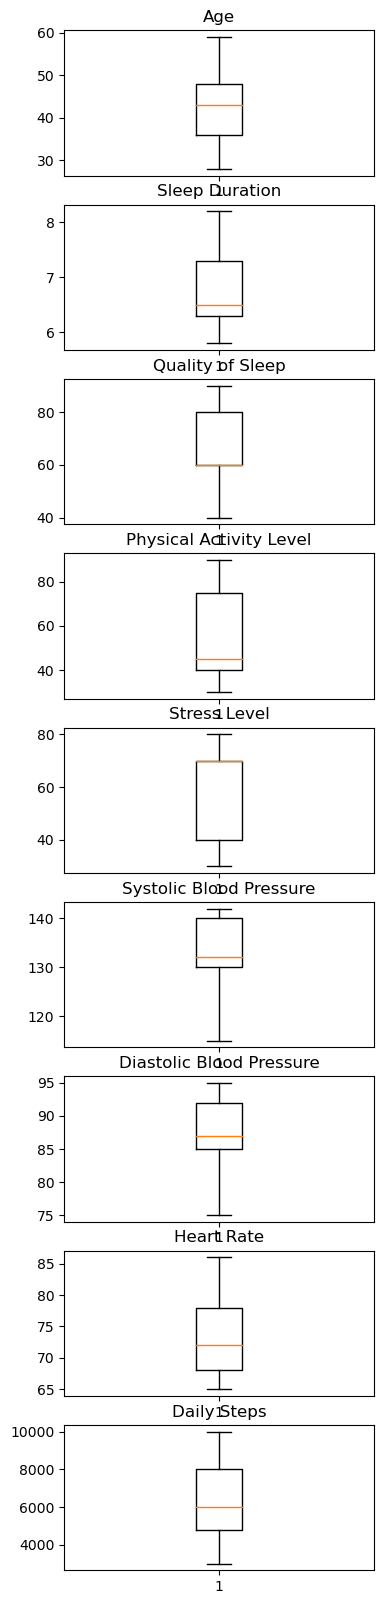

In [156]:
fig, ax = plt.subplots(9,1, figsize = (4,20))
ax[0].boxplot([clean_df['Age']])
ax[0].set_title("Age")

ax[1].boxplot([clean_df['Sleep Duration']])
ax[1].set_title("Sleep Duration")

ax[2].boxplot([clean_df['Quality of Sleep']])
ax[2].set_title("Quality of Sleep")

ax[3].boxplot([clean_df['Physical Activity Level']])
ax[3].set_title("Physical Activity Level")

ax[4].boxplot([clean_df["Stress Level"]])
ax[4].set_title("Stress Level")

ax[5].boxplot([clean_df['Systolic Blood Pressure']])
ax[5].set_title('Systolic Blood Pressure')

ax[6].boxplot([clean_df['Diastolic Blood Pressure']])
ax[6].set_title('Diastolic Blood Pressure')

ax[7].boxplot([clean_df["Heart Rate"]])
ax[7].set_title("Heart Rate")

ax[8].boxplot([clean_df["Daily Steps"]])
ax[8].set_title("Daily Steps")

plt.show()

**Through these *BoxPlots*, it appears to us that there are no outliers in the dataset**

so we will encode **Categrecal Columns** in order to display the pie chart for them

***Columns:***

1- Gender

2- Occupation

3- BMI Category

4- Sleep Disorder

In [216]:
new_df = clean_df.copy()

In [218]:
new_df['Gender'] = pd.factorize(new_df['Gender'], sort=True)[0]
new_df['Sleep Disorder'] = pd.factorize(new_df['Sleep Disorder'], sort=True)[0]
new_df['Occupation'] = pd.factorize(new_df['Occupation'], sort=True)[0]
new_df['BMI Category'] = pd.factorize(new_df['BMI Category'], sort=True)[0]

Make a **dictionary** for every colum encoded 

In [219]:
gender_dict = {0:'Female', 1: 'Male'}
Sleep_Disorder_dict = {1:'Sleep Apnea', 0: "Insomnia"}
Occupation_dict = {
    0:'Accountant',
    1:'Doctor',
    2:'Engineer',
    3:'Lawyer',
    4:'Nurse',
    5:'Sales Representative',
    6:'Salesperson',
    7:'Scientist',
    8:'Software Engineer',
    9:'Teacher'
}
BMI_Category_dict = {
    0:'Normal',
    1:'Obese',
    2:'Overweight'
}

# Exploratory Data Analysis (EDA)


**We have some questions to answer**

     1- What is the incidence of sleep apnea and insomnia according to gender?
     
     2- What is the incidence of sleep apnea and insomnia in relation to job?
     
     3- How many people exist in each Class ? is it related with the Fare paid ?
     
     4- What is the age distribution of survived people ?
     
     5- What is the relation between features ?

<Figure size 500x500 with 0 Axes>

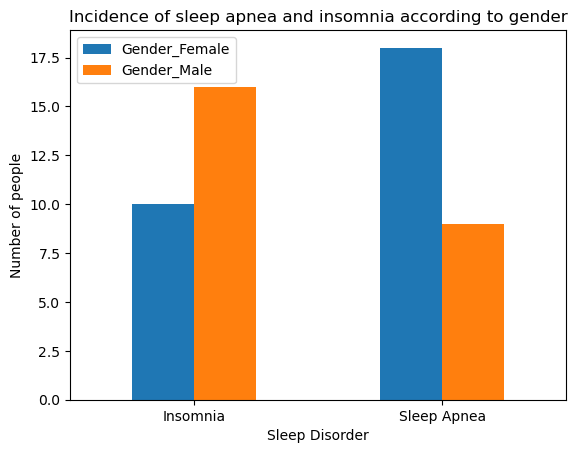

In [249]:
# Q-1
# Rates of insomnia and sleep apnea in women and men
copy_df = new_df.copy()
copy_df['Gender'] = pd.Series([gender_dict[x] for x in copy_df['Gender']])
copy_df = pd.get_dummies(copy_df, columns=['Gender'], dtype=np.int64)
copy_df
sleep_gender = copy_df.groupby('Sleep Disorder')[['Gender_Female','Gender_Male']].sum().rename(Sleep_Disorder_dict)

plt.figure(figsize=(5,5))
sleep_gender.plot(kind='bar')
plt.xlabel("Sleep Disorder")
plt.ylabel("Number of people")
plt.xticks(rotation=360)
plt.title("Incidence of sleep apnea and insomnia according to gender")
2plt.show()


Occupation  Sleep Disorder
0           0                 1
1           0                 2
2           0                 3
3           0                 2
4           0                 3
6           0                 6
8           0                 1
9           0                 8
Name: count, dtype: int64

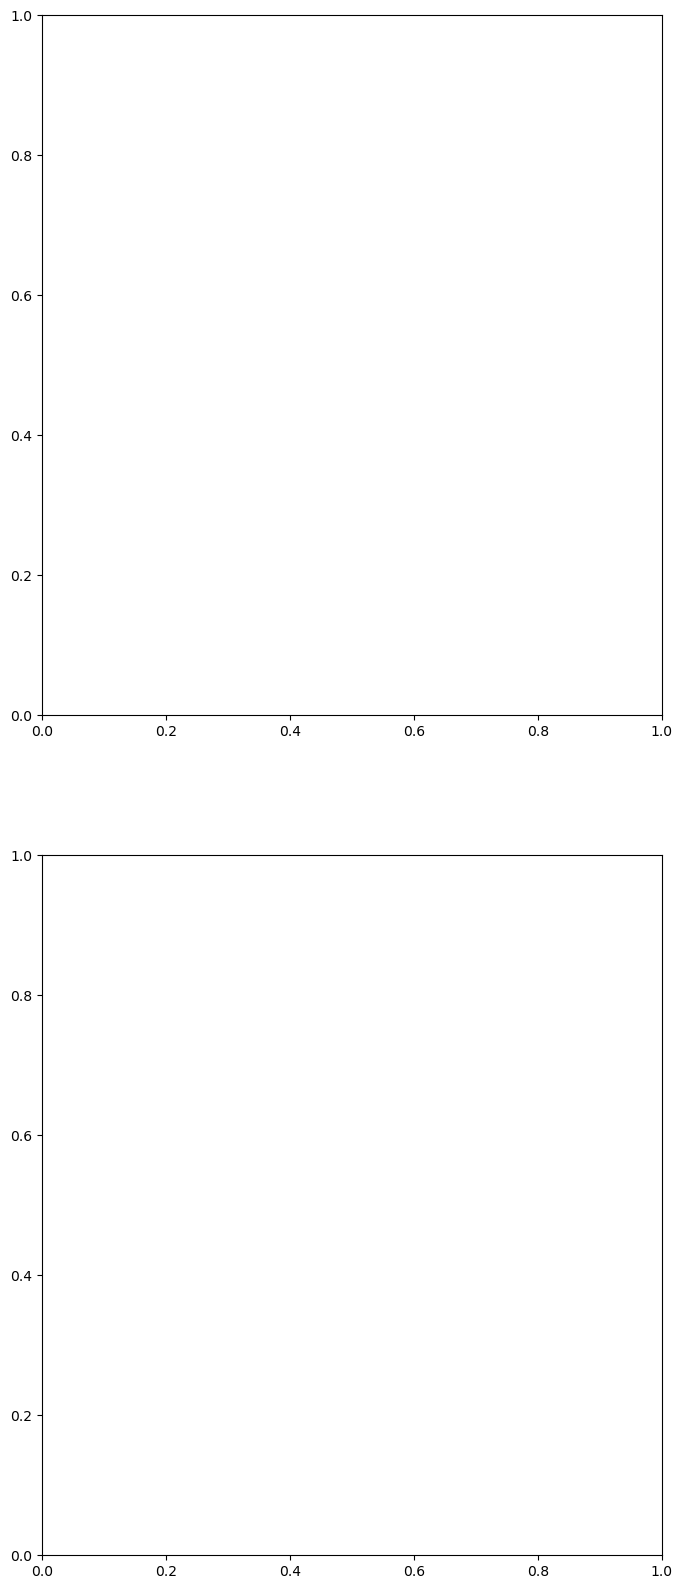

In [324]:
# Q-2 
# What is the incidence of sleep apnea and insomnia in relation to job?
fig, ax = plt.subplots(2,1, figsize=(8,20))
Sleep_Apnea = new_df.groupby('Occupation')['Sleep Disorder'].sum() / len(new_df['Sleep Disorder'] == 1)
Insomnia = new_df[new_df['Sleep Disorder'] == 0].groupby('Occupation')['Sleep Disorder'].value_counts()
# new_df.groupby('Occupation')['Sleep Disorder'].sum()
keys = list(Occupation_dict.values())
# ax[0].pie(Sleep_Apnea, labels=keys, autopct='%1.1f%%', rotatelabels=250, startangle=360)
# ax[1].pie(insomnia['count'], labels=keys, autopct='%1.1f%%', rotatelabels=250, startangle=360)
# plt.show()
Insomnia

***When we visualize the gender data in this dataset,
we find that this dataset is not biased towards any gender*** 

"normal" and "normal weight" essentially mean the same thing in this context, "overweight" and "obese" indicate different degrees of excess body weight, with "obese" representing a more severe level of adiposity and associated health risks.

In [250]:
clean_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,28,Sales Representative,5.9,40,30,80,Obese,140,90,85,3000,Sleep Apnea
1,Male,28,Software Engineer,5.9,40,30,80,Obese,140,90,85,3000,Insomnia
2,Male,29,Teacher,6.3,60,40,70,Obese,140,90,82,3500,Insomnia
3,Female,29,Nurse,6.5,50,40,70,Normal,132,87,80,4000,Sleep Apnea
4,Male,29,Doctor,6.0,60,30,80,Normal,120,80,70,8000,Sleep Apnea
5,Female,29,Nurse,6.5,50,40,70,Normal,132,87,80,4000,Insomnia
6,Female,30,Nurse,6.4,50,35,70,Normal,130,86,78,4100,Sleep Apnea
7,Female,30,Nurse,6.4,50,35,70,Normal,130,86,78,4100,Insomnia
8,Male,31,Doctor,7.7,70,75,60,Normal,120,80,70,8000,Sleep Apnea
9,Male,33,Doctor,6.0,60,30,80,Normal,125,80,72,5000,Insomnia


In [194]:
ds = clean_df.copy()


In [208]:
ds['Gender'] = pd.factorize(ds['Gender'], sort=True)[0]
ds['Sleep Disorder'] = pd.factorize(ds['Sleep Disorder'], sort=True)[0]
ds['Occupation'] = pd.factorize(ds['Occupation'], sort=True)[0]
ds['BMI Category'] = pd.factorize(ds['BMI Category'], sort=True)[0]
ds

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,28,5,5.9,40,30,80,1,140,90,85,3000,1
1,1,28,8,5.9,40,30,80,1,140,90,85,3000,0
2,1,29,9,6.3,60,40,70,1,140,90,82,3500,0
3,0,29,4,6.5,50,40,70,0,132,87,80,4000,1
4,1,29,1,6.0,60,30,80,0,120,80,70,8000,1
5,0,29,4,6.5,50,40,70,0,132,87,80,4000,0
6,0,30,4,6.4,50,35,70,0,130,86,78,4100,1
7,0,30,4,6.4,50,35,70,0,130,86,78,4100,0
8,1,31,1,7.7,70,75,60,0,120,80,70,8000,1
9,1,33,1,6.0,60,30,80,0,125,80,72,5000,0


In [209]:
gender_dict = {0:'Female', 1: 'Male'}
Sleep_Disorder_dict = {1:'Sleep Apnea', 0: "Insomnia"}
Occupation_dict = {
    0:'Accountant',
    1:'Doctor',
    2:'Engineer',
    3:'Lawyer',
    4:'Nurse',
    5:'Sales Representative',
    6:'Salesperson',
    7:'Scientist',
    8:'Software Engineer',
    9:'Teacher'
}
BMI_Category_dict = {
    0:'Normal',
    1:'Obese',
    2:'Overweight'
}

<Figure size 500x500 with 0 Axes>

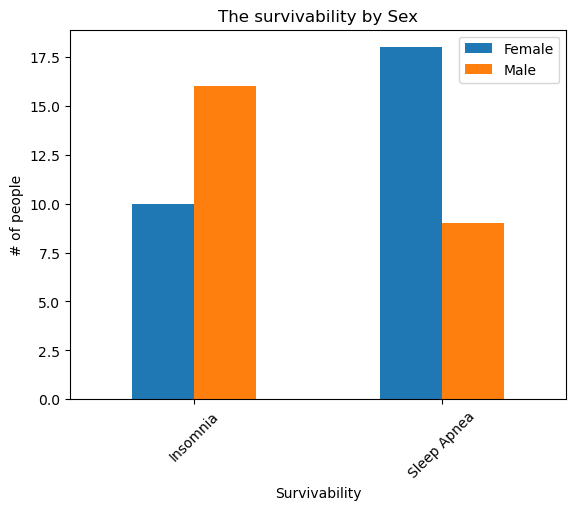

In [215]:
vis = ds.copy()
vis['Gender'] = vis['Gender'].apply(lambda x: gender_dict[x])
vis = pd.get_dummies(vis, columns=['Gender'], prefix='', prefix_sep='', dtype=np.int64)
sur_gen = vis.groupby('Sleep Disorder')[['Female','Male']].sum().rename(Sleep_Disorder_dict)

plt.figure(figsize=(5,5))
sur_gen.plot(kind='bar')
plt.xlabel("Survivability")
plt.ylabel("# of people")
plt.xticks(rotation=45)
plt.title("The survivability by Sex")
plt.show()